In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def polynomial_dataframe(feature: pd.Series, degree: int):
    poly_df = pd.DataFrame()
    poly_df['power_1'] = feature

    if degree > 1:        
        for power in range(2, degree+1):
            name = f'power_{power}'            
            poly_df[name] = feature**power

    return poly_df

In [ ]:
path = 'data\kc_house_data.csv'
sales = pd.read_csv(path)
sales = sales.sort_values(['sqft_living','price'])

In [ ]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

model1 = LinearRegression()
model1.fit(np.array(poly1_data['power_1']).reshape(-1,1), 
        np.array(poly1_data['price']).reshape(-1,1))

plt.scatter(poly1_data['power_1'], poly1_data['price'])
plt.plot(poly1_data['power_1'],
        model1.predict(np.array(poly1_data['power_1']).reshape(-1,1)),
        c='r', 
        linewidth=3)

In [ ]:
degree = 2

poly2_data = polynomial_dataframe(sales['sqft_living'], degree)
poly2_data['price'] = sales['price']

model2 = LinearRegression()
columns = poly2_data.columns[:-1]
model2.fit(poly2_data[columns], poly2_data['price'])

plt.scatter(poly2_data[f'power_1'], poly2_data['price'])
plt.plot(poly2_data[f'power_1'], model2.predict(poly2_data[columns]),
        c='r', 
        linewidth=3)
plt.show()        

In [ ]:
degree = 3

poly2_data = polynomial_dataframe(sales['sqft_living'], degree)
poly2_data['price'] = sales['price']

model2 = LinearRegression()
columns = poly2_data.columns[:-1]
model2.fit(poly2_data[columns], poly2_data['price'])

plt.scatter(poly2_data[f'power_1'], poly2_data['price'])
plt.plot(poly2_data[f'power_1'], model2.predict(poly2_data[columns]),
        c='r', 
        linewidth=3)

        
plt.show()      

In [ ]:
degree = 15

poly2_data = polynomial_dataframe(sales['sqft_living'], degree)
poly2_data['price'] = sales['price']

model2 = LinearRegression()
columns = poly2_data.columns[:-1]
model2.fit(poly2_data[columns], poly2_data['price'])

plt.scatter(poly2_data[f'power_1'], poly2_data['price'])
plt.plot(poly2_data[f'power_1'], model2.predict(poly2_data[columns]),
        c='r', 
        linewidth=3)
plt.show()      

In [ ]:
subset1 = pd.read_csv('data\wk3_kc_house_set_1_data.csv')
subset2 = pd.read_csv('data\wk3_kc_house_set_2_data.csv')
subset3 = pd.read_csv('data\wk3_kc_house_set_3_data.csv')
subset4 = pd.read_csv('data\wk3_kc_house_set_4_data.csv')

In [ ]:
degree = 15

poly1_data = polynomial_dataframe(subset1['sqft_living'], degree)
poly1_data['price'] = subset1['price']

model1 = LinearRegression()
columns_1 = poly1_data.columns[:-1]
B1.fit(poly1_data[columns_1], poly1_data['price'])

In [ ]:
degree = 15

poly2_data = polynomial_dataframe(subset2['sqft_living'], degree)
poly2_data['price'] = subset2['price']

B2 = LinearRegression()
columns_2 = poly2_data.columns[:-1]
B2.fit(poly2_data[columns_2], poly2_data['price'])

In [ ]:
degree = 15

poly3_data = polynomial_dataframe(subset3['sqft_living'], degree)
poly3_data['price'] = subset3['price']

model3 = LinearRegression()
columns_3 = poly3_data.columns[:-1]
model3.fit(poly3_data[columns_3], poly3_data['price'])

In [ ]:
degree = 15

poly4_data = polynomial_dataframe(subset4['sqft_living'], degree)
poly4_data['price'] = subset4['price']

model4 = LinearRegression()
columns_4 = poly4_data.columns[:-1]
model4.fit(poly4_data[columns_4], poly4_data['price'])

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(14)

ax1[0].scatter(poly1_data[f'power_1'], poly1_data['price'])
ax1[0].plot(poly1_data[f'power_1'],
        model1.predict(poly1_data[columns_1]),
        c='r', 
        linewidth=3)

ax1[1].scatter(poly2_data[f'power_1'], poly2_data['price'])
ax1[1].plot(poly2_data[f'power_1'],
        model2.predict(poly2_data[columns_2]),
        c='r', 
        linewidth=3)

ax2[0].scatter(poly3_data[f'power_1'], poly3_data['price'])
ax2[0].plot(poly3_data[f'power_1'],
        model3.predict(poly3_data[columns_3]),
        c='r', 
        linewidth=3)

ax2[1].scatter(poly4_data[f'power_1'], poly4_data['price'])
ax2[1].plot(poly4_data[f'power_1'],
        model4.predict(poly4_data[columns_4]),
        c='r', 
        linewidth=3)

plt.show()

In [ ]:
model1.coef_[0], model2.coef_[0], model3.coef_[0], model4.coef_[0]

In [ ]:
train = pd.read_csv('data\wk3_kc_house_train_data.csv')
test  = pd.read_csv('data\wk3_kc_house_test_data.csv')
valid = pd.read_csv('data\wk3_kc_house_valid_data.csv')

In [ ]:
models_RSS = []
for degree in range(6,7):
    poly_set = polynomial_dataframe(train['sqft_living'], degree)
    vali_data = polynomial_dataframe(valid['sqft_living'], degree)
    test_data = polynomial_dataframe(test['sqft_living'], degree)

    poly_set['price'] = train['price']
    columns = poly_set.columns[:-1]
    
    reg = LinearRegression()
    reg.fit(poly_set[columns], train['price'])
    #y_pred = reg.predict(vali_data[columns])
    y_test = reg.predict(test_data[columns])

    #rss = sum((y_pred - valid['price'])**2)
    rss_test = sum((y_test - test['price'])**2)
    models_RSS.append(rss_test)

In [ ]:
f'{min(models_RSS):.1e}'

In [ ]:
runtime = 100*1_000_000

(
    f'{runtime/60:,.0f}m', 
    f'{runtime/3600:,.0f}h', 
    f'{(runtime/3600)/24:,.0f}d', 
    f'{((runtime/3600)/24)/365:,.1f}y'
)

In [ ]:
k = 36
runtime = 100*k

(
    f'{runtime/60:,.0f}m', 
    f'{runtime/3600:,.0f}h'
)

<H2>L2 regularization example</H2>

In [3]:
import pandas as pd
import numpy as np

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('data/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
import pandas as pd

data = polynomial_dataframe(sales['sqft_living'], 15)
data['target'] = sales['price']
X = data[data.columns[:-1]]
y = data['target']

penalty = 1.5e-5
ridge = make_pipeline(
    StandardScaler(with_mean=False),
    Ridge(alpha=penalty*X.shape[0])
    )
ridge.fit(X,y)
ridge[1].coef_ /= ridge[0].scale_

<H2>Further analysis</H2>

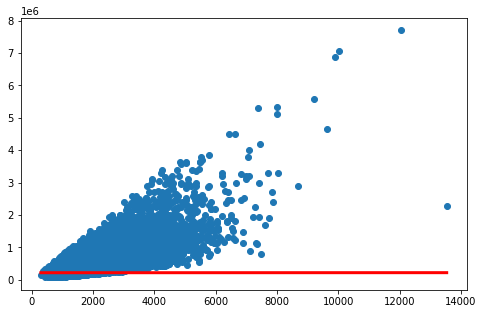

In [5]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(8)

ax.scatter(X['power_1'], y)
ax.plot(X['power_1'],
        ridge.predict(X),
        c='r', 
        linewidth=3)


In [6]:
# dtype_dict same as above
set_1 = pd.read_csv('data/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('data/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('data/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('data/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [25]:
def train_4sets(degree, penalty):
    models, datasets, data_columns = ([] for i in range(3))
    
    for subset in [set_1,set_2,set_3,set_4]:       
        _data = polynomial_dataframe(subset['sqft_living'], degree)
        _data['price'] = subset['price']    
        _columns = _data.columns[:-1]    
                            
        tmp = make_pipeline(
            StandardScaler(with_mean=False), 
            Ridge(alpha=penalty*_data.shape[0]))
                
        tmp.fit(_data[_columns], _data['price'])
        
        tmp[1].feature_names_in_ = _columns
        tmp[1].coef_ /= tmp[0].scale_
        
        data_columns.append(_columns)
        datasets.append(_data)
        models.append(tmp[1])
        
    return models, datasets, data_columns

l2_small_penalty = 1e-9
degree = 15
my_models, my_datasets, my_data_columns = train_4sets(degree, l2_small_penalty)

mini = np.min([tmp.coef_[0] for tmp in my_models])
maxi = np.max([tmp.coef_[0] for tmp in my_models])
print(f'min: {mini:_.5f}\nmax: {maxi:_.5f}')

min: -755.39590
max: 1_119.44562


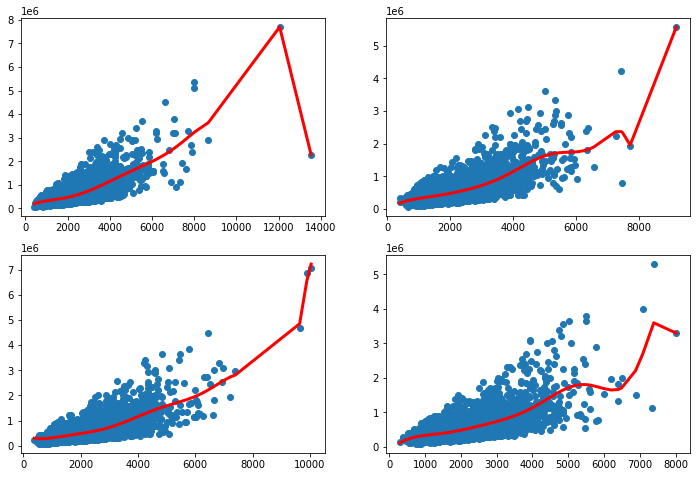

In [26]:
fig, (ax1,ax2) = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(12)


ax1[0].scatter(my_datasets[0]['power_1'], my_datasets[0]['price'])
ax1[0].plot(my_datasets[0]['power_1'], 
            my_models[0].predict(my_datasets[0][my_data_columns[0]]),
        c='r', 
        linewidth=3)

ax1[1].scatter(my_datasets[1]['power_1'], my_datasets[1]['price'])
ax1[1].plot(my_datasets[1]['power_1'],
            my_models[1].predict(my_datasets[1][my_data_columns[1]]),
        c='r', 
        linewidth=3)

ax2[0].scatter(my_datasets[2]['power_1'], my_datasets[2]['price'])
ax2[0].plot(my_datasets[2]['power_1'],
            my_models[2].predict(my_datasets[2][my_data_columns[2]]),
        c='r', 
        linewidth=3)

ax2[1].scatter(my_datasets[3]['power_1'], my_datasets[3]['price'])
ax2[1].plot(my_datasets[3]['power_1'], 
            my_models[3].predict(my_datasets[3][my_data_columns[3]]),
        c='r', 
        linewidth=3)

plt.show()

In [27]:
l2_large_penalty = 1.23e2
my_models, my_datasets, my_data_columns = train_4sets(degree, l2_large_penalty)

mini = np.min([tmp.coef_[0] for tmp in my_models])
maxi = np.max([tmp.coef_[0] for tmp in my_models])
print(f'min: {mini:_.2f}\nmax: {maxi:_.2f}')

min: 2.09
max: 2.33


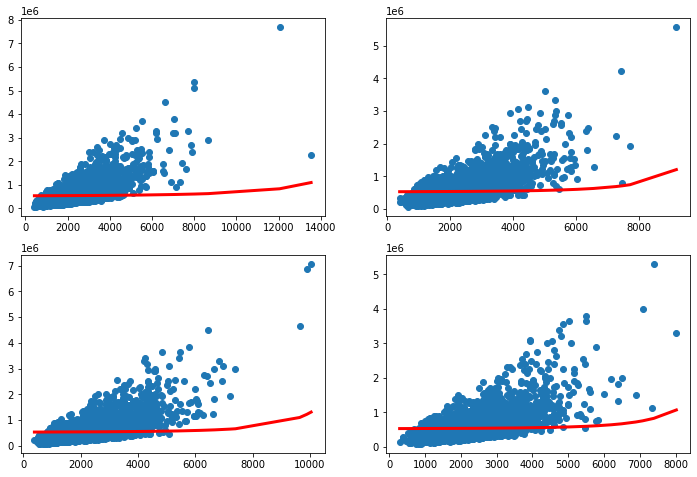

In [28]:
fig, (ax1,ax2) = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(12)


ax1[0].scatter(my_datasets[0]['power_1'], my_datasets[0]['price'])
ax1[0].plot(my_datasets[0]['power_1'], 
            my_models[0].predict(my_datasets[0][my_data_columns[0]]),
        c='r', 
        linewidth=3)

ax1[1].scatter(my_datasets[1]['power_1'], my_datasets[1]['price'])
ax1[1].plot(my_datasets[1]['power_1'],
            my_models[1].predict(my_datasets[1][my_data_columns[1]]),
        c='r', 
        linewidth=3)

ax2[0].scatter(my_datasets[2]['power_1'], my_datasets[2]['price'])
ax2[0].plot(my_datasets[2]['power_1'],
            my_models[2].predict(my_datasets[2][my_data_columns[2]]),
        c='r', 
        linewidth=3)

ax2[1].scatter(my_datasets[3]['power_1'], my_datasets[3]['price'])
ax2[1].plot(my_datasets[3]['power_1'], 
            my_models[3].predict(my_datasets[3][my_data_columns[3]]),
        c='r', 
        linewidth=3)

plt.show()

In [29]:
train_valid_shuffled = pd.read_csv('data/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('data/wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [30]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i) / k
    end = (n*(i+1)) / k-1

    
start = (n*i)/10
end = (n*(i+1))/10
train_valid_shuffled[int(start):int(end)+1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17456,1703400585,20141215T000000,325000.0,3.0,2.00,2330.0,4950,1.5,0,0,...,6,1430,900,1900,0,98118,47.5585,-122.290,1160.0,5115.0
17457,6448600060,20150226T000000,1550000.0,5.0,2.50,2450.0,20805,2.0,0,0,...,9,2450,0,1963,0,98004,47.6275,-122.227,3020.0,20324.0
17458,3329500730,20141111T000000,220000.0,3.0,1.75,1290.0,8250,1.0,0,0,...,7,1290,0,1983,0,98001,47.3353,-122.270,1410.0,7823.0
17459,5210200410,20141114T000000,840000.0,5.0,2.75,2790.0,20824,1.0,0,0,...,9,1680,1110,1959,0,98115,47.6948,-122.282,2380.0,10465.0
17460,1822069041,20141113T000000,400000.0,6.0,2.00,2320.0,210830,2.0,0,0,...,8,2320,0,1962,0,98058,47.3980,-122.081,2540.0,217800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19391,2473450870,20141006T000000,325000.0,3.0,2.25,2480.0,8755,2.0,0,0,...,8,2480,0,1979,0,98058,47.4543,-122.125,2280.0,9940.0
19392,9328500630,20150302T000000,545000.0,3.0,2.25,1670.0,6240,1.0,0,0,...,8,1240,430,1974,0,98008,47.6413,-122.113,1910.0,7000.0
19393,5631500254,20141007T000000,519900.0,4.0,2.50,2403.0,6172,2.0,0,0,...,9,2403,0,1999,0,98028,47.7361,-122.234,2380.0,6075.0
19394,4139480190,20140916T000000,1153000.0,3.0,3.25,3780.0,10623,1.0,0,1,...,11,2650,1130,1999,0,98006,47.5506,-122.101,3850.0,11170.0


In [31]:
pd.concat(
    [train_valid_shuffled[0:int(start)], 
    train_valid_shuffled[int(end)+1:n]]
    )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4.0,2.50,2800.0,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580.0,5900.0
1,1703050500,20150321T000000,645000.0,3.0,2.50,2490.0,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710.0,6629.0
2,5700002325,20140605T000000,640000.0,3.0,1.75,2340.0,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360.0,4725.0
3,0475000510,20141118T000000,594000.0,3.0,1.00,1320.0,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700.0,5000.0
4,0844001052,20150128T000000,365000.0,4.0,2.50,1904.0,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560.0,12426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17451,6793300220,20150105T000000,739000.0,3.0,2.75,2950.0,6667,2.0,0,0,...,9,2950,0,2003,0,98029,47.5577,-122.026,3340.0,6667.0
17452,7465900060,20150205T000000,425000.0,3.0,1.00,1010.0,5864,1.0,0,0,...,7,1010,0,1915,0,98116,47.5733,-122.381,1290.0,5000.0
17453,2695600410,20141106T000000,428950.0,2.0,1.00,1760.0,4441,1.0,0,0,...,8,1310,450,1950,0,98126,47.5311,-122.381,1350.0,5748.0
17454,2550820060,20150428T000000,280000.0,3.0,1.75,1630.0,10001,1.0,0,0,...,7,1100,530,1977,0,98042,47.3605,-122.120,1630.0,10001.0


In [38]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    validation_errors = []
    
    n = data.shape[0]
    for i in range(k):
        start = int(
            (n*i) / k)
        end = int(
            (n*(i+1)) / k-1)        
        
        X_valid, y_valid = data[start:end+1], output[start:end+1]    
        
        X_train = pd.concat([data[end+1:n], 
                             data[0:start]])        
        
        y_train = pd.concat([output[end+1:n],
                             output[0:start]])
        
        model = make_pipeline(
            StandardScaler(with_mean=False), 
            Ridge(alpha=l2_penalty*X_train.shape[0])
            )
        model.fit(X_train, y_train)
        
        rss = (model.predict(X_valid) - y_valid)**2
        validation_errors.append(sum(rss))
        
        
    average_validation_error = np.mean(validation_errors)
    return average_validation_error



X = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
y = train_valid_shuffled['price']

l2_penalties = np.logspace(3, 9, num=13)
lowest = []
for (penalty, i) in zip(l2_penalties, range(len(l2_penalties))):
    lowest.append(
        k_fold_cross_validation(10, penalty, X ,y)
        )

In [93]:
best_penalty = l2_penalties[np.argmin(lowest)]

train_data = pd.read_csv('data\wk3_kc_house_train_data.csv')
test_data  = pd.read_csv('data\wk3_kc_house_test_data.csv')

X_train, y_train = polynomial_dataframe(train_data['sqft_living'], 15), train_data['price']
X_test, y_test = polynomial_dataframe(test_data['sqft_living'], 15), test_data['price']

mvp_model = make_pipeline(
    StandardScaler(with_mean=False),
    Ridge(alpha=best_penalty*X_train.shape[0])
    )
mvp_model.fit(X_train, y_train)
mvp_model[1].feature_names_in_ = X_train.columns
mvp_model[1].coef_ /= mvp_model[0].scale_

RSS = sum((mvp_model[1].predict(X_test) - y_test)**2)
f'{RSS:e}', 8e13<RSS<4e14

('2.837065e+14', True)